---
title: 21天学通C++ Chapter10 实现继承
tags: 小书匠,21天学通C++,c++,public,private
grammar_cjkRuby: true
renderNumberedHeading: true
---

[toc]

# 21天学通C++ Chapter10 实现继承

## 继承基础

### 简单的继承结构

In [1]:
#include <iostream>

class Fish
{
    public:
        bool isFreshWaterFish;
        void Swim() {
            if (isFreshWaterFish) 
                std::cout << "Swins in lake\n";
            else
                std::cout << "Swins in sea\n";
        }
};

In [2]:
class Carp: public Fish
{
    public:
        Carp() { isFreshWaterFish = false;}
};

In [3]:
class Tuna: public Fish
{
    public:
        Tuna() { isFreshWaterFish = true; }
}

In [4]:
Carp myLunch;
Tuna myDinner;
std::cout << "About my food:\n";
std::cout << "Lunch:  ";
myLunch.Swim();
std::cout << "Dinner: ";
myDinner.Swim();

About my food:
Lunch:  Swins in sea
Dinner: Swins in lake


### protected

上面的例子中有不好的地方。isFreshWaterFish 属性是公有的，因此可以在外部访问。

In [5]:
myDinner.isFreshWaterFish = true;

我们需要让属性可以在子类中访问，但是不希望在子类外访问。此时可以使用 protected 作为限定符修饰 isFreshWaterFish

In [6]:
#include <iostream>

class Fish
{
    protected:
        bool isFreshWaterFish;
    public:
        void Swim() {
            if (isFreshWaterFish) 
                std::cout << "Swins in lake\n";
            else
                std::cout << "Swins in sea\n";
        }
};

In [7]:
class Carp: public Fish
{
    public:
        Carp() { isFreshWaterFish = false;}
};

In [8]:
class Tuna: public Fish
{
    public:
        Tuna() { isFreshWaterFish = true; }
}

In [9]:
Carp myLunch;
Tuna myDinner;
std::cout << "About my food:\n";
std::cout << "Lunch:  ";
myLunch.Swim();
std::cout << "Dinner: ";
myDinner.Swim();
// myDinner.isFreshWaterFish = true; // compile error

About my food:
Lunch:  Swins in sea
Dinner: Swins in lake


### 在派生类中覆盖基类的方法

要重写，就需要派生类中的方法和基类中的方法，即返回值和函数签名相同。

In [10]:
#include <iostream>

class Fish
{
    private:
        bool isFreshWaterFish;
    public:
        Fish(bool isFreshWaterFish): isFreshWaterFish(isFreshWaterFish) {}
        void Swim() {
            if (isFreshWaterFish) 
                std::cout << "Swins in lake\n";
            else
                std::cout << "Swins in sea\n";
        }
};

In [11]:
class Carp: public Fish
{
    public:
        Carp(): Fish(false) {}
        // overwrite
        void Swim() { std::cout << "Carp swins slow\n";}
};

In [12]:
class Tuna: public Fish
{
    public:
        Tuna(): Fish(true) {}
        // overwrite
        void Swim() { std::cout << "Tuna swins fast\n";}
}

In [13]:
Carp myLunch;
Tuna myDinner;
std::cout << "About my food:\n";
std::cout << "Lunch:  ";
myLunch.Swim();
std::cout << "Dinner: ";
myDinner.Swim();

About my food:
Lunch:  Carp swins slow
Dinner: Tuna swins fast


那我们如果希望调用被覆盖的方法怎么办？此时需要使用域名解析符 :: 来调用了

In [14]:
myDinner.Fish::Swim();

Swins in lake


### 在派生类中调用基类的方法

In [15]:
#include <iostream>

class Fish
{
    private:
        bool isFreshWaterFish;
    public:
        Fish(bool isFreshWaterFish): isFreshWaterFish(isFreshWaterFish) {}
        void Swim() {
            if (isFreshWaterFish) 
                std::cout << "Swins in lake\n";
            else
                std::cout << "Swins in sea\n";
        }
};

In [16]:
class Carp: public Fish
{
    public:
        Carp(): Fish(false) {}
        // overwrite
        void Swim() { 
            Fish::Swim(); // invoke Swim() of Fish
            std::cout << "Carp swins slow\n";
        }
};

In [17]:
class Tuna: public Fish
{
    public:
        Tuna(): Fish(true) {}
        // overwrite
        void Swim() { 
            Fish::Swim(); // invoke Swim() of Fish
            std::cout << "Tuna swins fast\n";
        }
};

In [18]:
int main()
{
    Carp myLunch;
    Tuna myDinner;
    std::cout << "About my food:\n";
    std::cout << "Lunch:  ";
    myLunch.Swim();
    std::cout << "Dinner: ";
    myDinner.Swim();
}
main();

About my food:
Lunch:  Swins in sea
Carp swins slow
Dinner: Swins in lake
Tuna swins fast


### 基类中有多个重载版本的情况

有一种情况。就是基类中的方法有多个重载版本。而在子类中只重写其中一个版本，基类中的其他版本也不能调用了。此时称基类的那些没有被重写的重载版本的函数被隐藏了。

In [2]:
#include <iostream>

class Fish {
    public:
        void Swim() { std::cout << "Fish swims\n";}
        void Swim(bool isFreshWaterFish) { 
            if (isFreshWaterFish)
                std::cout << "Swim in lake\n";
            else
                std::cout << "Swim in sea\n";
        }
};

In [3]:
class Tuna: public Fish
{
    public: 
        void Swim() { std::cout << "Tuna swims fast\n"; }
};

In [4]:
Tuna tuna;
tuna.Swim();
// tuna.Swim(false); // compile error 这个版本不能调用。

Tuna swims fast


有三种方法可以解决这个问题。

#### 在调用的时候通过域名解析符来调用基类的方法而非子类的方法 （不推荐）

这个方法虽然可以解决。但是没做很好的做到对类外隐藏实现细节（调用者还需要知道那个方法被隐藏了那个方法没有被隐藏）。

In [5]:
tuna.Fish::Swim(false);

Swim in sea


#### 使用 using 让子类可以访问到被隐藏的方法（推荐）

In [6]:
class Tuna: public Fish
{
    public: 
        using Fish::Swim; // unhide all Swim method in class Fish
        void Swim() { std::cout << "Tuna swims fast\n"; }
};

In [7]:
Tuna tuna;
tuna.Swim();
tuna.Swim(false);

Tuna swims fast
Swim in sea


#### 方法三：重写所有方法（废话...）

In [10]:
class Tuna: public Fish
{
    public: 
        void Swim() { std::cout << "Tuna swims fast\n"; }
        // 重载了 void Swim(bool) 方法。其中重用了 void Fish::Swim(bool) 方法
        void Swim(bool isFreshWaterFish) { Fish::Swim(isFreshWaterFish); }
};

In [11]:
Tuna tuna;
tuna.Swim();
tuna.Swim(false);

Tuna swims fast
Swim in sea


### 构造和析构顺序

构造顺序:
1. 构造时先构造成员对象，然后调用构造函数
2. 构造时先构造对象继承基类的部分，后构造子类的部分

析构顺序:析构顺序和构造顺序正好相反
1. 先析构成员对象，再调用自己的析构函数。
2. 先析构子类部分，再析构基类部分。

In [17]:
#include <iostream>

class FishDummyMember {
    public: 
        FishDummyMember() { std::cout << "FishDummyMember constructor\n"; }
        ~FishDummyMember() { std::cout << "FishDummyMember destructor\n"; }
    
};

In [18]:
class TunaDummyMember {
    public: 
        TunaDummyMember() { std::cout << "TunaDummyMember constructor\n"; }
        ~TunaDummyMember() { std::cout << "TunaDummyMember destructor\n"; }
    
};

In [19]:
class Fish {
    private:
        FishDummyMember fishDummyMember;
    public: 
        Fish() { std::cout << "Fish constructor\n"; }
        ~Fish() { std::cout << "Fish destructor\n"; }
    
};

In [20]:
class Tuna: public Fish
{
    private:
        TunaDummyMember tunaDummyMember;
    public: 
        Tuna() { std::cout << "Tuna constructor\n"; }
        ~Tuna() { std::cout << "Tuna destructor\n"; }
    
};

In [21]:
int main() 
{
    Tuna tuna;
    return 0;
}
main();

FishDummyMember constructor
Fish constructor
TunaDummyMember constructor
Tuna constructor
Tuna destructor
TunaDummyMember destructor
Fish destructor
FishDummyMember destructor


上面的输出验证了：
1. 构造时先构造成员对象，然后调用构造函数，因此 FisDummyMember 先输出，Fish 后输出。
2. 构造时先构造对象继承基类的部分，后构造子类的部分，因此 Fish 输出在 Tuna 输出之前。
3. 析构顺序和构造顺序正好相反。先析构子类部分，再析构基类部分。先析构成员对象，再调用自己的析构函数。

## 私有继承

私有继承和公有继承的使用场景不同，私有继承用来表达 `has-a` 关系，即 `Derived has a Base` 这样的关系

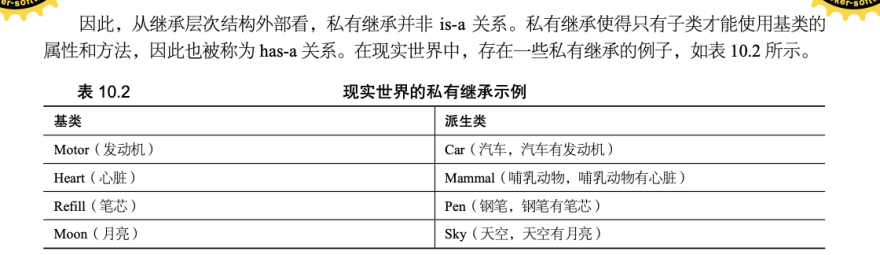

In [27]:
#include <iostream>

class Motor
{
    public:
        void SwitchIgnition() { std::cout << "Ignition ON\n"; } 
        void PumpFuel() { std::cout << "Fuel in cylinders\n"; }
        void FireCylinders() { std::cout << "Vroooom\n";}
}

In [28]:
class Car: private Motor
{
    public: 
        void Move()
        {
            SwitchIgnition();
            PumpFuel();
            FireCylinders();
        }
};

In [32]:
Car car;
car.Move();
// car.PumpFuel(); // compile error

input_line_45:4:5: error: 'PumpFuel' is a private member of '__cling_N528::Motor'
car.PumpFuel(); // compile error
    ^
input_line_41:1:12: note: constrained by private inheritance here
class Car: private Motor
           ^~~~~~~~~~~~~
input_line_40:5:14: note: member is declared here
        void PumpFuel() { std::cout << "Fuel in cylinders\n"; }
             ^
input_line_45:4:1: error: cannot cast '__cling_N529::Car' to its private base class '__cling_N528::Motor'
car.PumpFuel(); // compile error
^
input_line_41:1:12: note: declared private here
class Car: private Motor
           ^~~~~~~~~~~~~


Interpreter Error: 

## 保护继承

保护继承和私有继承都是用来表达 `has-a` 关系的。

私有继承和保护继承使用比较少，一般使用组合来代替私有继承和保护继承去表示 `has-a` 关系。

## 切除问题

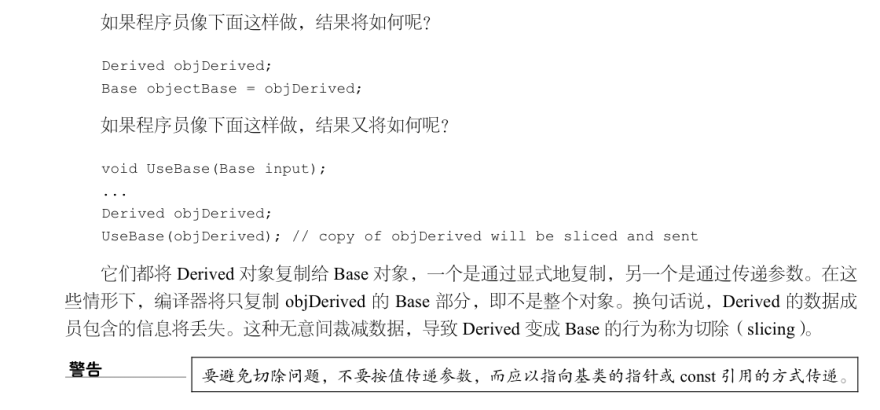

# References
- 21天学通C++ 第8版 Chapter10